In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPool2D
from tensorflow.keras.models import Sequential

In [3]:
pip install --upgrade mlxtend

     |████████████████████████████████| 1.3MB 13.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [5]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
classes=[0,1,2,3,4,5,6,7,8,9]

In [9]:
x_train=x_train/255
x_test=x_test/255

Its 5


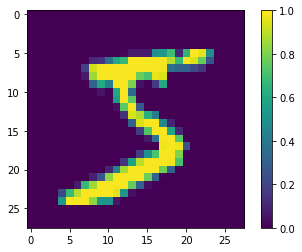

In [10]:
plt.imshow(x_train[0])
plt.colorbar()
print("Its",y_train[0])
plt.show()

#MODEL

In [11]:
model=Sequential()

In [12]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4087 - accuracy: 0.8793 - val_loss: 0.1730 - val_accuracy: 0.9453
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1884 - accuracy: 0.9444 - val_loss: 0.1328 - val_accuracy: 0.9582
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1429 - accuracy: 0.9577 - val_loss: 0.1116 - val_accuracy: 0.9664
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1189 - accuracy: 0.9642 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1023 - accuracy: 0.9692 - val_loss: 0.0950 - val_accuracy: 0.9705


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9705


[0.09500720351934433, 0.9704999923706055]

In [16]:
yhat=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
mat=confusion_matrix(y_test,yhat)

In [18]:
mat

array([[ 973,    0,    1,    1,    0,    0,    1,    1,    2,    1],
       [   0, 1119,    5,    3,    0,    0,    1,    0,    7,    0],
       [   6,    2,  989,   13,    3,    1,    3,    5,    9,    1],
       [   0,    0,    1,  995,    0,    5,    0,    6,    3,    0],
       [   2,    0,    6,    0,  954,    0,    3,    4,    1,   12],
       [   4,    0,    0,   13,    1,  865,    3,    1,    2,    3],
       [  10,    3,    3,    1,    4,   11,  920,    1,    5,    0],
       [   2,    4,    9,    7,    0,    0,    0,  999,    0,    7],
       [   6,    2,    2,    7,    6,   10,    4,    3,  929,    5],
       [   5,    3,    0,    9,   15,    4,    0,    7,    4,  962]])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f6e312a58>)

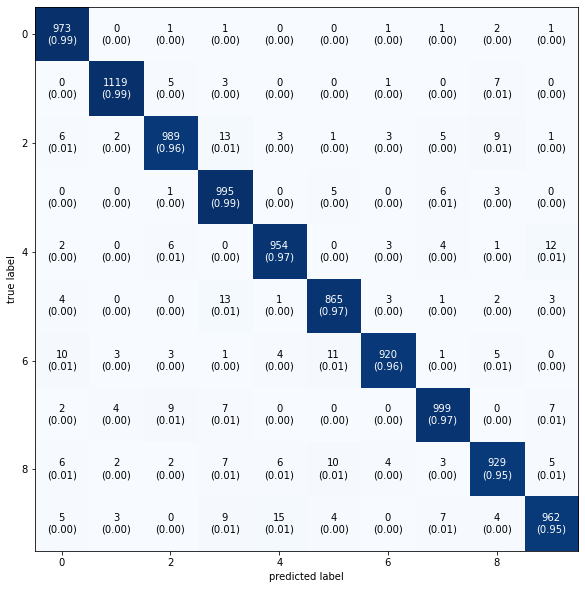

In [19]:
plot_confusion_matrix(mat,figsize=(10,10),show_normed=True)